***
# <font color=green size=10>Relatório de Análise</font>
***
## Estudo do valor do metro² no Brasil, separado por estado.

Sabemos que o custo da moradia no Brasil tem sido elevado devido aos últimos acontecimentos, e, também, devido ao crescimento exponencial das cidades, reduzindo a quantidade de espaço disponível e assim, fazendo com que os preços subam. A mudança mais perceptível está no custo dos imóveis para compra ou aluguel. No entanto, para quem deseja começar uma construção do zero, independente da finalidade, não levando em conta o custo dos demais materiais, quanto em média custaria para se adquirir um terreno para começar sua construção?

Os dados utilizados foram obtidos do site do IBGE, e são de outubro de 2021

Iremos filtrar algumas informações obtidas desde conjunto de dados para facilitar a compreensão

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
pd.options.display.max_rows = 200 # Altera o numero de linhs que sao mostradas num dataFrame

In [2]:
df = pd.read_csv('Dataset/custo_do_m2.csv')
# fonte : https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9270-sistema-nacional-de-pesquisa-de-custos-e-indices-da-construcao-civil.html?=&t=resultados

In [3]:
df.head(5)

,Unidade Geográfica,Custo médio m² - moeda corrente-Reais,Custo médio m² - número-índice-Número-índice,Custo médio m² - variação percentual em doze meses-%,Custo médio m² - variação percentual no ano-%,Custo médio m² - variação percentual no mês-%
0,Acre,1570.60,833.61,15.29,12.32,1.67
1,Alagoas,1341.20,670.05,20.03,16.06,1.35
2,Amapá,1406.14,682.98,13.90,10.95,1.32
3,Amazonas,1428.45,699.31,16.63,12.54,0.74
4,Bahia,1465.66,775.73,24.33,17.24,0.58


In [4]:
#Realizando a troca do nome de algumas colunas para melhor compreensão

df.rename(columns={' Unidade Geográfica':'Estado',
                   'Custo médio m² - moeda corrente-Reais': 'Custo médio do m² em R$',
                   'Custo médio m² - variação percentual no mês-%':'Variação percentual mês de outubro',
                   'Custo médio m² - variação percentual no ano-%': 'Variação percentual no ano de 2021 até outubro'
                  }, inplace = True)

In [5]:
#Realizado o drop de algumas colunas para nao pertinente para essa visualização para facilitar a compreensão
df.drop(['Custo médio m² - número-índice-Número-índice', 'Custo médio m² - variação percentual em doze meses-%'],
       axis = 1,
       inplace = True
       )

In [6]:
#Alterando o indexo para estado
df.set_index('Estado', inplace = True)

In [7]:
#Removendo colunas que não são estados
df.drop(['Sul','Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste', 'Brasil'], axis = 0, inplace = True)

In [8]:
df.head(10)

,Custo médio do m² em R$,Variação percentual no ano de 2021 até outubro,Variação percentual mês de outubro
Estado,,,
Acre,1570.60,12.32,1.67
Alagoas,1341.20,16.06,1.35
Amapá,1406.14,10.95,1.32
Amazonas,1428.45,12.54,0.74
Bahia,1465.66,17.24,0.58
Ceará,1379.18,16.63,0.56
Distrito Federal,1524.57,15.14,1.18
Espírito Santo,1366.19,16.39,0.61
Goiás,1456.61,13.87,1.49


In [60]:
#Classificando algumas medidas de têndencia centrale de dispersão

valormax = round (df['Custo médio do m² em R$'].max(), 2)
valormin = df['Custo médio do m² em R$'].min()
media = round(df['Custo médio do m² em R$'].mean(), 2)
moda = df['Custo médio do m² em R$'].mode()
diferencaMaxMin = round(((valormax - valormin)/valormin)*100, 2)
mediana = df['Custo médio do m² em R$'].median() #Valor central dessa população
desvioMedioAbsoluto = round(df['Custo médio do m² em R$'].mad())
variancia = round(df['Custo médio do m² em R$'].var(), 2)
desvioPadrao = round(df['Custo médio do m² em R$'].std(), 2)



dataset = {'Valor Máximo por m² no Brasil':valormax,
           'Valor Mínimo por Metro m² no Brasil':valormin,
           'Diferença em % entre do valor mínimo ao máximo': diferencaMaxMin,
           'Media abosuluta dos valores':media,
           'Mediana':mediana,
           #'Moda':moda,
           'Desvio Médio absoluto':desvioMedioAbsoluto,
           'variancia':variancia,
           'Desvio Padrao':desvioPadrao
          }


pd.Series(dataset).round(2)

Valor Máximo por m² no Brasil                     1695.78
Valor Mínimo por Metro m² no Brasil               1303.56
Diferença em % entre do valor mínimo ao máximo      30.09
Media abosuluta dos valores                       1458.16
Mediana                                           1460.63
Desvio Médio absoluto                               73.00
variancia                                         9165.33
Desvio Padrao                                       95.74
dtype: float64

In [12]:
np.sqrt(9165)

95.73400649716902

In [39]:
media = df['Custo médio do m² em R$'].mean()
df['Desvio'] = (df['Custo médio do m² em R$'] - media).abs().round(2) #valores absolutos
df

,Custo médio do m² em R$,Variação percentual no ano de 2021 até outubro,Variação percentual mês de outubro,Desvio
Estado,,,,
Acre,1570.60,12.32,1.67,112.44
Alagoas,1341.20,16.06,1.35,116.96
Amapá,1406.14,10.95,1.32,52.02
Amazonas,1428.45,12.54,0.74,29.71
Bahia,1465.66,17.24,0.58,7.50
Ceará,1379.18,16.63,0.56,78.98
Distrito Federal,1524.57,15.14,1.18,66.41
Espírito Santo,1366.19,16.39,0.61,91.97
Goiás,1456.61,13.87,1.49,1.55


In [14]:
ListConstruc = [i / 100 for i in range(1, 101)]
divisaoEmPercent = round(df['Custo médio do m² em R$'].quantile(ListConstruc), 2) # Separa os valores em percentis (Medidas separatrizes)
divisaoEmPercent

0.01    1308.06
0.02    1312.56
0.03    1317.05
0.04    1321.67
0.05    1326.96
0.06    1332.25
0.07    1337.54
0.08    1342.22
0.09    1345.53
0.10    1348.84
0.11    1352.16
0.12    1354.41
0.13    1355.44
0.14    1356.46
0.15    1357.49
0.16    1359.21
0.17    1361.37
0.18    1363.53
0.19    1365.69
0.20    1368.79
0.21    1372.17
0.22    1375.54
0.23    1378.92
0.24    1383.26
0.25    1387.67
0.26    1392.08
0.27    1396.36
0.28    1398.95
0.29    1401.55
0.30    1404.14
0.31    1406.73
0.32    1409.28
0.33    1411.82
0.34    1414.37
0.35    1417.19
0.36    1420.44
0.37    1423.70
0.38    1426.95
0.39    1431.29
0.40    1436.58
0.41    1441.86
0.42    1447.14
0.43    1450.18
0.44    1452.22
0.45    1454.26
0.46    1456.30
0.47    1457.49
0.48    1458.54
0.49    1459.58
0.50    1460.63
0.51    1461.30
0.52    1461.97
0.53    1462.64
0.54    1463.31
0.55    1463.95
0.56    1464.58
0.57    1465.22
0.58    1466.69
0.59    1470.05
0.60    1473.41
0.61    1476.76
0.62    1478.76
0.63    

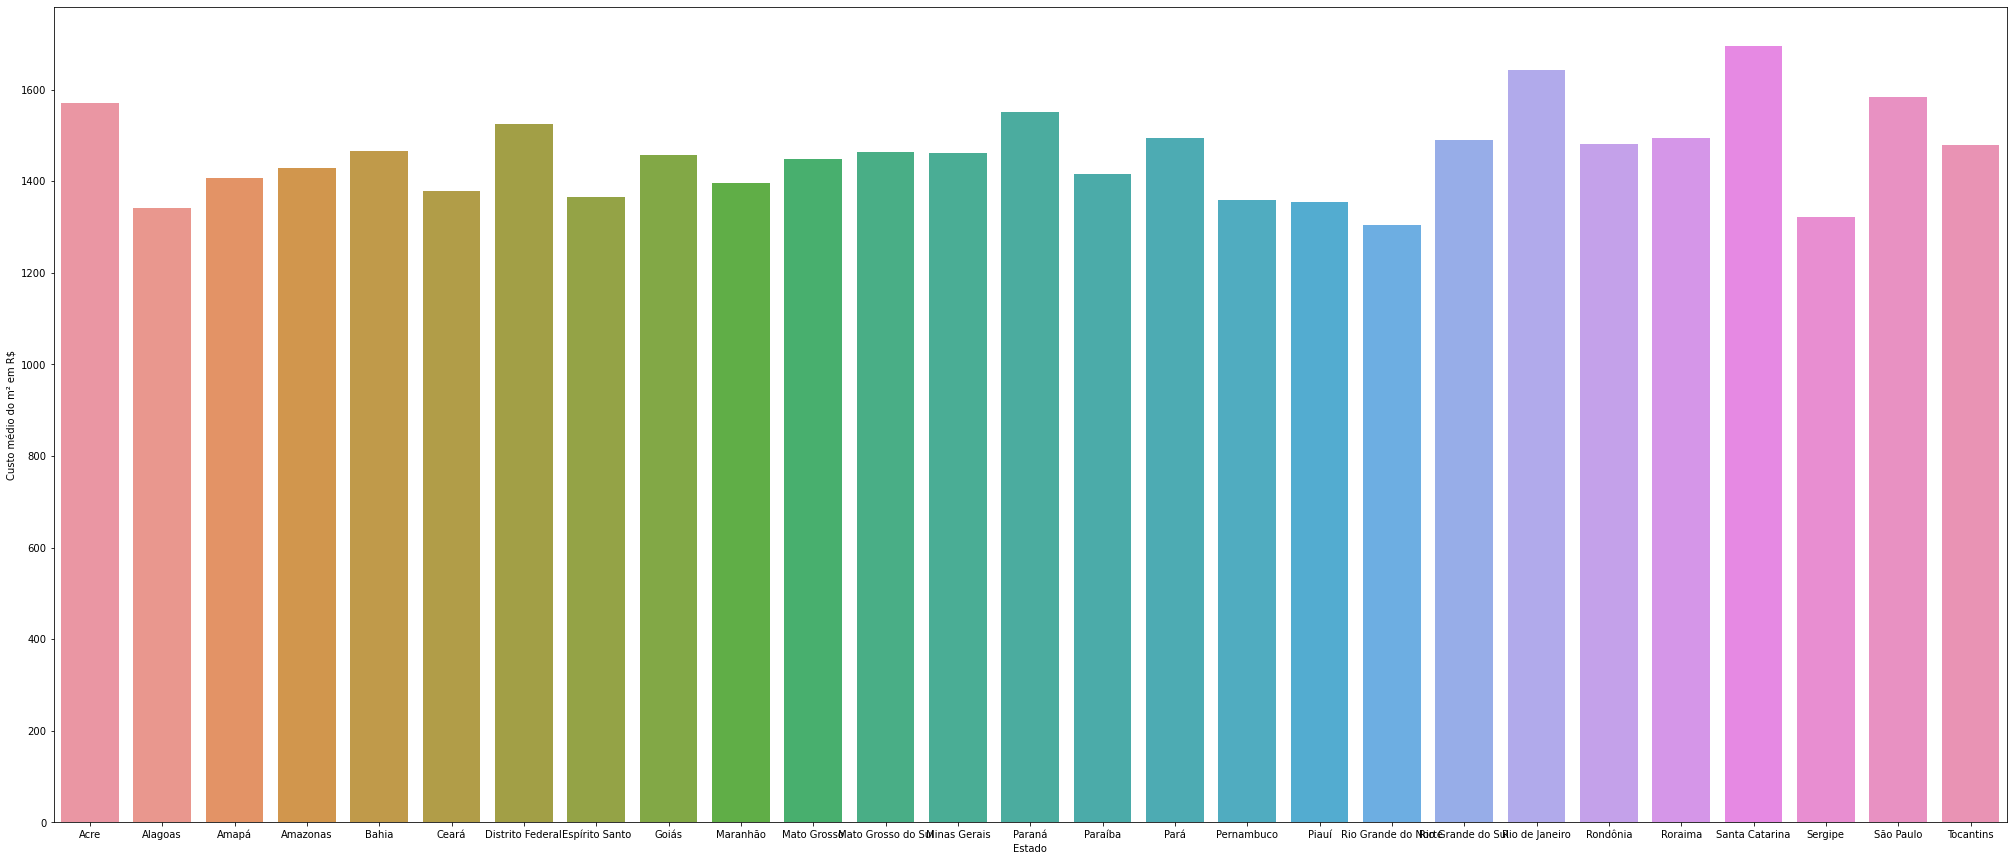

In [15]:
ax = sns.barplot(x = df.index , y = 'Custo médio do m² em R$', data = df)
ax.figure.set_size_inches(35,15)

<AxesSubplot:title={'center':'Anos de Estudo'}, xlabel='Custo médio do m² em R$'>

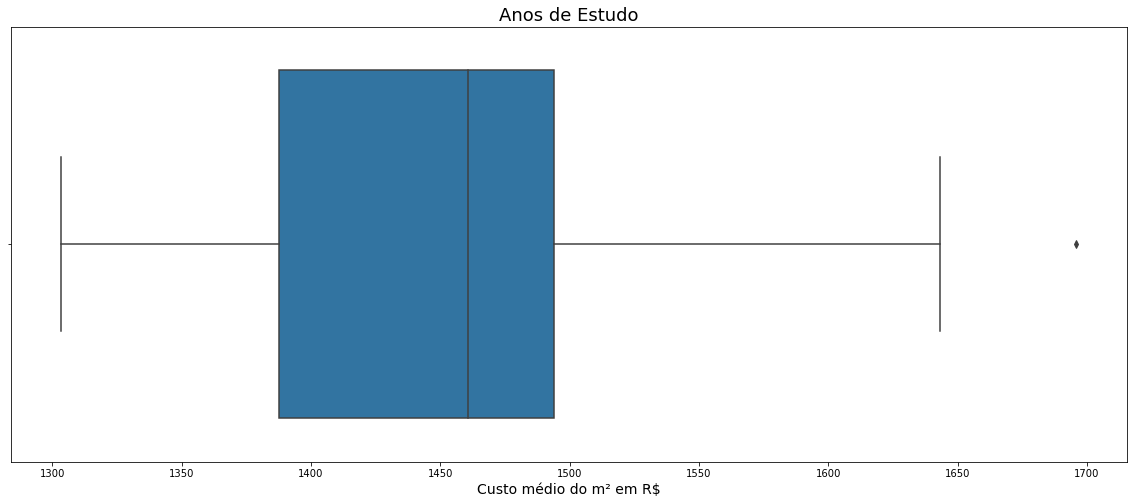

In [16]:
ax = sns.boxplot( x = 'Custo médio do m² em R$', data = df)
ax.figure.set_size_inches(20, 8)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Custo médio do m² em R$', fontsize=14)
ax


# Aplicando o metodo sturges 

Trata-se de um modo de organizar um conjunto de dados observados para se ter uma ideia de seu comportamento, ou seja, de sua distribuição. Relaciona categorias ou classes de valores, juntamente com contagens ou frequências do número de valores que se enquadram em cada categoria.

* Para variáveis discretas: proporção em relação à característica.
* Para variáveis contínuas: proporção em relação a intervalos

## Regra de Sturges
A regra de Sturges serrver para definirmos o número ideal de intervalos que podemos ter em uma determinnada população.
A regra de esturges é devida através da fórmula abaixo

# $$k = 1 + \frac {10}{3}\log_{10}n$$

n = Numero de elementos

In [17]:
n =  df.shape[0]
n

27

In [18]:
k = int(1 + (10 / 3) * np.log10(n))
k 

5

Conforme obtido da regra de Sturges, O úmero de classes ideal para essa população é 5, usaremos esse valor abaixo >

In [40]:
# o comando abaixo divide em classe o data set informado

classes = pd.value_counts( #sepera em valores unicos, facilitando a compreensao do cut, do contrario, seria aplicado a todos os valores, ainda que repetido
            pd.cut(
            x = df['Custo médio do m² em R$'], #Especifiando os dados
            bins = k, #numero de classes pretendidos
            include_lowest = True,
            labels = ['1303.167 |- 1382.00',
                      '1382.004 |- 1460.448',
                      '1460.448 |- 1538.892',
                      '1538.892 |- 1617.336',
                      '1617.336 |- 1695.78']
            ), #antes de setar os labels, foi verificador o valor das classes que seria obtido
               #os labels foram montados para melhor compreensão 
            sort = False #Desativando a ordenação automática do value counts, para que as classes sejam ordenadas de menor par aa maior, independete do numero de integrante dessa classe
)

dfClasses = pd.DataFrame(classes)
dfClasses.rename_axis('Intervalos', axis = 'columns', inplace = True)
dfClasses.rename(columns = {'Custo médio do m² em R$':'Quantidade / Frequência'}, inplace = True)


Abaixo vemos o resultado da distrubuição de classes utlizando a regra de Sturges 

In [41]:
dfClasses

Intervalos,Quantidade / Frequência
1303.167 |- 1382.00,7
1382.004 |- 1460.448,6
1460.448 |- 1538.892,9
1538.892 |- 1617.336,3
1617.336 |- 1695.78,2


### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

A variancia para é de R$ 9165.33

No entanto, para que possamos ter um resoltado mais preciso, utilizaremos o desvio padrão, que ira nos dizer quanto em média cada valor desvia da média de todos os valores

### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

O desvio padrão para o preço do metro quadrado no Brasil por estado é de R$ 95,74.

Para simplificar, isso significa que, em média, por estado, o valor varia em torno de R$95,74 em relação a média de todos os estados

# Realação entre média moda e media

<img src='Dataset/img004.png' width='80%'>

A curva central representa uma distribuição normal dos dados
As demais representão distribuições paranormais
Abaixo, iremos elabora um gráfico com base nas informações da colução 'Custo médio do m² em R$' para classificar se estamos lidando como uma distribuição normal ou para normal dos dados

C:\Users\fqueirox\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Custo médio do m² em R$', ylabel='Density'>

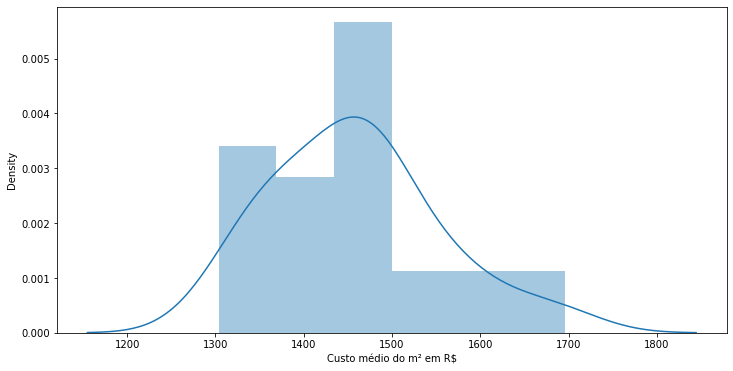

In [54]:
ax1 = sns.distplot(df['Custo médio do m² em R$']) #foi feito uma query para filtrar os dados apenas < 20000
#a syntax foi levemente alterada mas com o mesmo signnificado
#A função 'query' so funciona para DataFrames, como nao funciona para series, foi usado dois colches como macete para que
#o comentdo interpretasse uma unica coluna como um data frame
ax1.figure.set_size_inches(12, 6)
ax1

Como foi possível analisar, nossa distribuição mais se assemelha a uma distribuição normal, nesse caso, podemos utilizar desvio padrao e media com base na curva de gauss

# Curva de gauss

<img src="Dataset\iqbellcurve03.jpg">

A curva de gauss (idealizada pelo matemático alemão Fredric Gauss) btem como parâmetro o desvio padrão, que,conforme foi calculado anteriormente, é de 95.74

A cada dois desvios padrões afastados da média (nesse caso, dois devios padrões são 2 x 95.74 = 191.48) temos aénas 4,2% da população sobrando 

In [68]:
media

1458.16

In [105]:
media2desvios_positivo = media + desvioPadrao * 2
media2desvios2_negativo = media - desvioPadrao * 2

print(f'1:{media2desvios2_negativo} ' + f'2:{media2desvios_positivo} ')

1:1266.68 2:1649.64 


In [104]:
media + desvioPadrao

1553.9

In [103]:
df['Custo médio do m² em R$'].std() * 2

191.47149684108098

In [110]:
df.query('`Custo médio do m² em R$` > 1000')

SyntaxError: Could not convert 'BACKTICK_QUOTED_STRING_Custo_médio_do_m²_em_R_DOLLARSIGN_' to a valid Python identifier. (<string>)

# Visão sobre o custo do m² no estado de São Paulo

O custo médio do m² no brasil é de R$ 1.458,16

O custo médio, considerando somente o estado de são paulo é de R$ 1.584,37, esse valor é 8,6% maior do que a média nacional

Porém, é 7,03% mais barata do que a média do m² no estado de SC que é a mais cara, estando em R$ 1.695,78

Segundo algumas informações obtidas de obtidas da gestão urbana de São Paulo, através do site: <br>
https://gestaourbana.prefeitura.sp.gov.br/frente-e-area-minima-do-lote/ <br>
A área mínima de um Lote em SP é de 125m²

Considerando que em média o m² em SP é de R\$ 1.584,37

Temos que, em média, o mínimo para adquirir um terreno em SP é de R$ 198.046,25

In [42]:
df

,Custo médio do m² em R$,Variação percentual no ano de 2021 até outubro,Variação percentual mês de outubro,Desvio
Estado,,,,
Acre,1570.60,12.32,1.67,112.44
Alagoas,1341.20,16.06,1.35,116.96
Amapá,1406.14,10.95,1.32,52.02
Amazonas,1428.45,12.54,0.74,29.71
Bahia,1465.66,17.24,0.58,7.50
Ceará,1379.18,16.63,0.56,78.98
Distrito Federal,1524.57,15.14,1.18,66.41
Espírito Santo,1366.19,16.39,0.61,91.97
Goiás,1456.61,13.87,1.49,1.55


In [46]:
df['Custo médio do m² em R$'].mean()

1458.1644444444446

In [51]:
df.groupby(['Custo médio do m² em R$', df.index]).sum()

,,Variação percentual no ano de 2021 até outubro,Variação percentual mês de outubro,Desvio
Custo médio do m² em R$,Estado,,,
1303.56,Rio Grande do Norte,15.39,1.08,154.60
1320.86,Sergipe,17.88,0.69,137.30
1341.20,Alagoas,16.06,1.35,116.96
1353.94,Piauí,11.75,0.94,104.22
1357.88,Pernambuco,16.71,0.67,100.28
1366.19,Espírito Santo,16.39,0.61,91.97
1379.18,Ceará,16.63,0.56,78.98
1396.16,Maranhão,14.92,0.40,62.00
1406.14,Amapá,10.95,1.32,52.02


In [27]:
6 / 60

0.1

In [33]:
prob = binom.pmf(1, 1, 0.1)
print('%.8f' % prob)

0.10000000


In [32]:
6 / 60

0.1

In [21]:
pd.Series(df['Custo médio do m² em R$'].describe())

count      27.000000
mean     1458.164444
std        95.735748
min      1303.560000
25%      1387.670000
50%      1460.630000
75%      1494.135000
max      1695.780000
Name: Custo médio do m² em R$, dtype: float64

In [22]:
horaSono = pd.DataFrame({'Horas de sono':[7,8,6,0,7,7,10]})
horaSono['Desvio'] = (horaSono['Horas de sono'] - horaSono['Horas de sono'].mean()).abs()
horaSono

,Horas de sono,Desvio
0,7,0.571429
1,8,1.571429
2,6,0.428571
3,0,6.428571
4,7,0.571429
5,7,0.571429
6,10,3.571429


In [ ]:
media = horaSono['Horas de sono'].mean()
somario = 0

for item in horaSono['Horas de sono']:
    print(item)
    somario += (item - media)**2
    print(somario)

somario / 7

In [23]:
horaSono['Horas de sono'].var()

9.619047619047619

In [24]:
7 - media

-1451.1644444444446